In [1]:
import os
import pandas as pd

df = pd.read_csv("adult.data",
                 header=None,
                 encoding='utf-8')
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [14]:
df = pd.get_dummies(df)
df.dropna(how='all')
df.tail()

,0,2,4,10,11,12,1_ ?,1_ Federal-gov,1_ Local-gov,1_ Never-worked,...,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,14_ <=50K,14_ >50K
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32560,52,287927,9,15024,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split


y = df.iloc[0:32560, 14].values

# extract sepal length and petal length
X = df.iloc[0:32560, :14].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = MinMaxScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[0.15068493 0.09862088 0.86666667 ... 0.         0.         1.        ]
 [0.32876712 0.12590351 0.53333333 ... 0.         0.         0.        ]
 [0.30136986 0.05907803 0.6        ... 0.         0.         0.        ]
 ...
 [0.15068493 0.08766051 0.6        ... 1.         0.         0.        ]
 [0.23287671 0.11764958 0.53333333 ... 0.         0.         0.        ]
 [0.08219178 0.08365762 0.6        ... 0.         0.         0.        ]]


In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import auc

mlp = MLPClassifier(random_state=1, max_iter=200).fit(X_train, y_train)
y_pred = mlp.predict(X_test_std)

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f'%accuracy_score(y_test,y_pred))
print('Accuracy: %.3f'%mlp.score(X_test_std,y_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr) 

Misclassified examples: 1681
Accuracy: 0.828
Accuracy: 0.828


0.9139184760344121

In [38]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=15, 
                                    random_state=1)
tree_model.fit(X_train_std, y_train)

y_pred = tree_model.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print(y_pred)
print(tree_model.score(X_test_std, y_test))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr) 

Misclassified examples: 15
[0 0 0 ... 0 0 0]
0.9984643734643734
Accuracy: 0.998


0.49943670626792297

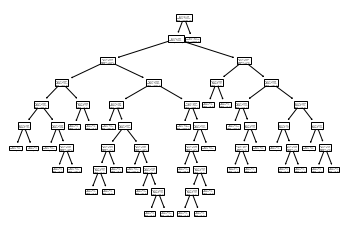

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(tree_model)
plt.show()

In [34]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#svm = SGDClassifier(loss='hinge')
svm = SVC(kernel='linear', C=1.0, random_state=1)

svm.fit(X_train_std, y_train)
score = svm.score(X_test_std, y_test)
print(score)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr) 

1.0


1.0

In [14]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=1.0, random_state=1,gamma="auto")
#clf = svm(kernel='rbf', C=1.0, random_state=1)

clf.fit(X_train_std, y_train)
score = clf.score(X_test_std, y_test)
print(score)

0.7592137592137592


In [43]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print(y_pred)
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Misclassified examples: 3425
[' >50K' ' >50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']
Accuracy: 0.649
Accuracy: 0.649


In [36]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
from sklearn.metrics import auc

lr = LogisticRegression(C=100.0, random_state=1, solver='sag', multi_class='auto',max_iter=100)
lr.fit(X_train_std, y_train)

lr.score(X_test_std, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr) 

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U6'), dtype('<U6')) -> None

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

print('Accuracy: %.3f' % knn.score(X_test_std, y_test))

Accuracy: 0.708
